In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import sklearn as sk
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#### import csv from INTERNET ####
#_______________________________________________________________________#
# df1_1 = df1.iloc[0:350001]
# df1_2 = df1.iloc[350001:700001]
# df1_3 = df1.iloc[700001:1050001]
# df1_4 = df1.iloc[1050001:1400001]
# df1_5 = df1.iloc[1400001:1472952]

#csv_url from google drive
# df1_1_url = 'https://docs.google.com/spreadsheets/d/1LCTsodwfXxXyzy6UdWM6DxUbRjGu9pdVAbqbor67mww/export?format=csv'
# df1_2_url = 'https://docs.google.com/spreadsheets/d/1PqynlnuOobWxYefWgkJLXSW2-ZX9-DO5h_o7cFdvVLQ/export?format=csv'
# df1_3_url = 'https://docs.google.com/spreadsheets/d/1E-L-74ygqU6Mg9O8ZwWiFIrzIQnHsaA5FFMjKH5VTIg/export?format=csv'
# df1_4_url = 'https://docs.google.com/spreadsheets/d/19S0JKsD9sz3Tc1bDs0SEVQrjHvh9LzBRI9_KhV_JtNw/export?format=csv'
# df1_5_url = 'https://docs.google.com/spreadsheets/d/1huyvsbuIztSH7louLyn6YJ_RV1hRs33HzKnkHgD7ouI/export?format=csv'
# df_2_url  = 'https://docs.google.com/spreadsheets/d/124UG2zAG-YtyGqNiarZlwiKYnu_BD3H7Ub4f0zJlcII/export?format=csv'

# # List of URLs
# urls = [df1_1_url, df1_2_url, df1_3_url, df1_4_url, df1_5_url]

# # Function to load data from URL
# def load_data(url):
#     return pd.read_csv(url, index_col=0)

# # Use ThreadPoolExecutor to parallelize data loading
# with ThreadPoolExecutor(max_workers=len(urls)) as executor:
#     dfs = list(executor.map(load_data, urls))

# # Combining loaded DataFrames
# df1_1, df1_2, df1_3, df1_4, df1_5= dfs
# df1 = pd.concat([df1_1, df1_2, df1_3, df1_4, df1_5], axis=0)
# df2 = pd.read_csv(df_2_url)

#_______________________________________________________________________#






In [5]:
#### import csv from LOCAL ####
df1 = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data.csv')
df2 = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

#combining df1 and df2 into df
df = pd.concat([df1,df2], axis=0)

In [6]:
df = df.sort_index()
df


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,2024-01-12 23:39:55,PayPal,health & beauty,2,29,North Laurafort,desktop,27.245.104.92,USNV Griffin\nFPO AA 52700,USNV Griffin\nFPO AA 52700,0,149,23
1472948,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,2024-03-27 04:31:45,credit card,clothing,2,32,Burnsville,tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, GA 68797","478 John Square Apt. 235\nMillerhaven, GA 68797",0,132,4
1472949,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,2024-01-31 23:51:42,bank transfer,electronics,4,36,Garciafort,mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, OH ...","182 House Island Suite 198\nEast Scott, FM 84301",0,98,23
1472950,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,2024-01-12 16:21:32,bank transfer,electronics,5,34,Lake Josephberg,desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...","27307 Gonzalez Shore Suite 661\nPort Lynn, WV ...",0,191,16


In [7]:
#clean column names function
def clean_my_columns(df):
    df.columns = df.columns.str.replace(" ", "_").str.lower().str.strip()
    return df


In [8]:
#clean column names 
clean_my_columns(df)
df.columns

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour'],
      dtype='object')

In [9]:
df1.shape

(1472952, 16)

In [10]:
df2.shape

(23634, 16)

In [11]:
df.shape

(1496586, 16)

In [12]:
df['is_fraudulent'].value_counts()

is_fraudulent
0    1421526
1      75060
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496586 entries, 0 to 1472951
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   transaction_id      1496586 non-null  object 
 1   customer_id         1496586 non-null  object 
 2   transaction_amount  1496586 non-null  float64
 3   transaction_date    1496586 non-null  object 
 4   payment_method      1496586 non-null  object 
 5   product_category    1496586 non-null  object 
 6   quantity            1496586 non-null  int64  
 7   customer_age        1496586 non-null  int64  
 8   customer_location   1496586 non-null  object 
 9   device_used         1496586 non-null  object 
 10  ip_address          1496586 non-null  object 
 11  shipping_address    1496586 non-null  object 
 12  billing_address     1496586 non-null  object 
 13  is_fraudulent       1496586 non-null  int64  
 14  account_age_days    1496586 non-null  int64  
 15  transaction_hour    

In [14]:
df['product_category'].value_counts()

product_category
electronics        300042
health & beauty    300038
clothing           299018
toys & games       298996
home & garden      298492
Name: count, dtype: int64

In [15]:
# make transaction to date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [16]:
#Extract day of the week from date:

df['day_of_week'] = df['transaction_date'].dt.dayofweek

In [17]:
# extract month

df['month'] = df['transaction_date'].dt.month


In [18]:
# check for duplicates

df.duplicated().sum()

0

In [19]:
df.describe()

,transaction_amount,transaction_date,quantity,customer_age,is_fraudulent,account_age_days,transaction_hour,day_of_week,month
count,1.496586e+06,1496586,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06
mean,2.268093e+02,2024-02-16 16:51:02.520362496,3.000235e+00,3.451284e+01,5.015415e-02,1.796308e+02,1.128663e+01,2.946627e+00,2.051424e+00
min,1.000000e+01,2024-01-01 00:00:00,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.862000e+01,2024-01-24 08:13:24.500000,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00,1.000000e+00,1.000000e+00
50%,1.517600e+02,2024-02-16 17:07:44,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01,3.000000e+00,2.000000e+00
75%,2.960500e+02,2024-03-11 00:44:25.249999872,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01,5.000000e+00,3.000000e+00
max,1.270175e+04,2024-04-07 08:54:03,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01,6.000000e+00,4.000000e+00
std,2.705831e+02,NaN,1.414814e+00,1.000323e+01,2.182630e-01,1.068726e+02,6.976067e+00,2.009261e+00,8.739732e-01


In [20]:
df_num = df.select_dtypes(include='number')

df_num2=df_num.drop(columns='transaction_amount')

In [21]:
# Outliers (boxplot and histogram)

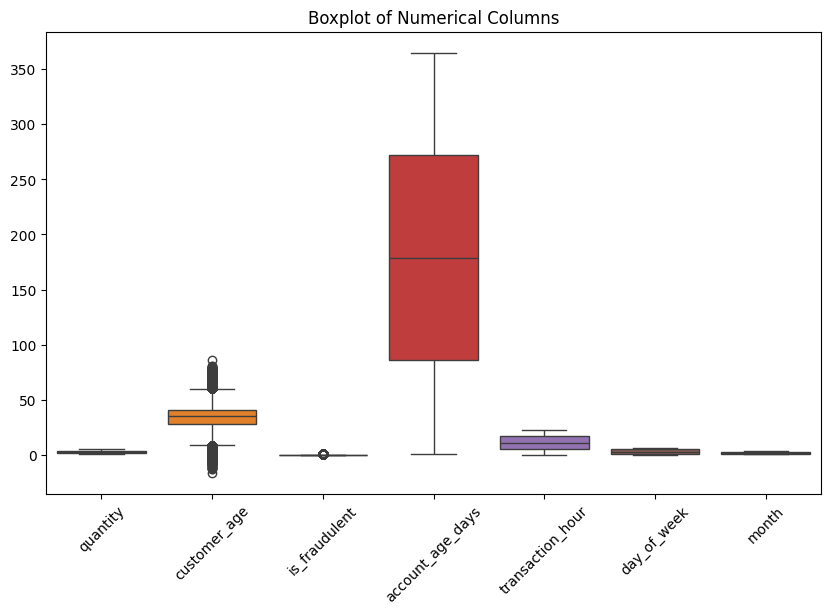

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num2)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [23]:
# There were negative values in age. We replaced them with median age:

df.loc[df['customer_age'] <= 0, 'customer_age'] = df['customer_age'].median()


## EDA

In [68]:
df_num2.columns

Index(['transaction_amount', 'quantity', 'customer_age', 'is_fraudulent',
       'account_age_days', 'transaction_hour', 'day_of_week', 'month'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

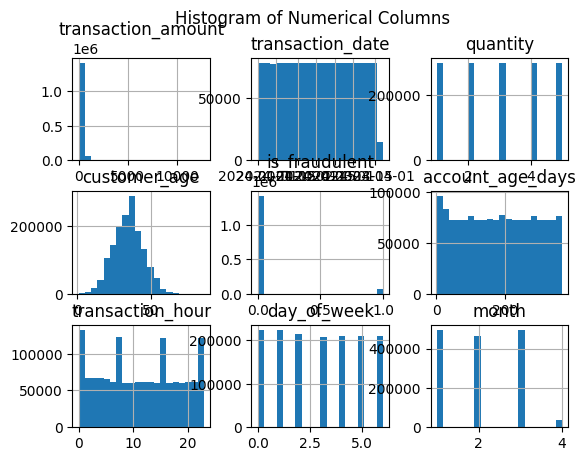

In [24]:
# this has to be fixed into nice plots ;)

plt.figure(figsize=(20, 20))
df.hist(bins=20)
plt.suptitle('Histogram of Numerical Columns')
plt.show()

## Treating imbalance in data - undersampling

In [25]:

# Sampling the data into balanced dataset
df_fraud = df[df['is_fraudulent'] == 1]
df_non_fraud = df[df['is_fraudulent'] == 0]

In [26]:
fraud_sample = df_fraud.sample(n=75000, random_state=0)

non_fraud_sample = df_non_fraud.sample(n=75000, random_state=0)


In [27]:
print(fraud_sample.shape)
print(non_fraud_sample.shape)

(75000, 18)
(75000, 18)


In [28]:
df_random_sample = pd.concat([fraud_sample,non_fraud_sample], axis=0)
df_random_sample.shape

(150000, 18)

In [29]:
df_num2 = df_random_sample.select_dtypes(include='number')


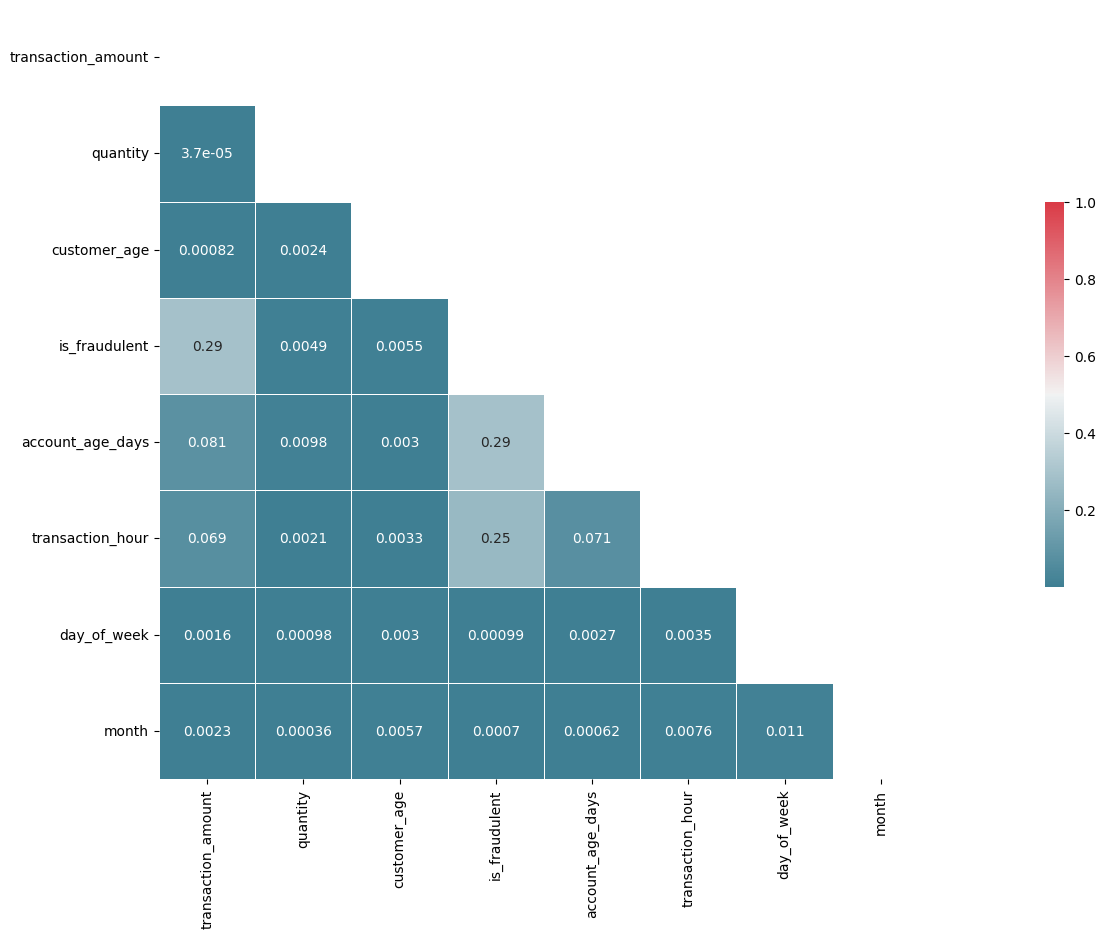

In [30]:
corr = np.abs(df_num2.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Feauture engineering

### Numerical:
- transaction amount
- age (drop?)
- transaction hour
- account_age_days
- quantity (drop?)

### Categorical (to be changed to numerical)
-  payment_method', -> one-hot encoding
- 'product_category'-> one-hot encoding
- 'device_used' -> one-hot encoding 


### To add/create:
- fraud day (of the week) - done!
      
       



In [31]:
dummies = pd.get_dummies(df_random_sample[['payment_method', 'product_category', 'device_used']], drop_first=True)
dummies.shape

(150000, 9)

In [32]:
df_random_sample=pd.concat([df_random_sample, dummies], axis=1)
df_random_sample.head()

,transaction_id,customer_id,transaction_amount,transaction_date,payment_method,product_category,quantity,customer_age,customer_location,device_used,...,month,payment_method_bank transfer,payment_method_credit card,payment_method_debit card,product_category_electronics,product_category_health & beauty,product_category_home & garden,product_category_toys & games,device_used_mobile,device_used_tablet
460327,dea8ab5a-e234-46ba-bf92-ff81fc2b269c,03edf5b4-3cc1-4d57-ab70-e2a1268e825f,136.84,2024-03-09 02:46:18,PayPal,health & beauty,3,40,Andersontown,mobile,...,3,False,False,False,False,True,False,False,True,False
275047,a74dc910-4d2c-45e1-968f-d603047911e3,14133654-e4e7-4a85-b9c1-e91b3a664733,11.66,2024-03-23 11:18:14,credit card,home & garden,3,30,Tamarahaven,tablet,...,3,False,True,False,False,False,True,False,False,True
681032,e1c9c51e-da9e-49c8-9469-eba85f104f2f,2604e833-442f-45f5-99d8-76318ef26165,227.69,2024-02-28 02:52:15,debit card,health & beauty,4,41,Stephenhaven,tablet,...,2,False,False,True,False,True,False,False,False,True
184103,b7a9bab5-9702-403f-8cfd-1738ba1a0e2c,6a06b7f8-4e52-436d-b539-422d04704cc7,2117.15,2024-02-21 09:28:01,PayPal,toys & games,5,24,Hillhaven,tablet,...,2,False,False,False,False,False,False,True,False,True
1335300,4da0974a-311f-4308-8459-cb2171510281,9f5cef80-5cbb-404c-a558-af71eb16fb60,25.89,2024-02-24 21:53:48,bank transfer,home & garden,3,47,New Daniel,tablet,...,2,True,False,False,False,False,True,False,False,True


In [33]:
features = df_random_sample.drop(columns= ["transaction_id", "customer_id", "transaction_date", "payment_method", "product_category","customer_location", 'device_used', 'ip_address','shipping_address','billing_address','is_fraudulent' ])
target=df_random_sample["is_fraudulent"]

In [34]:
df_random_sample.columns

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour', 'day_of_week', 'month',
       'payment_method_bank transfer', 'payment_method_credit card',
       'payment_method_debit card', 'product_category_electronics',
       'product_category_health & beauty', 'product_category_home & garden',
       'product_category_toys & games', 'device_used_mobile',
       'device_used_tablet'],
      dtype='object')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
knn = KNeighborsClassifier(n_neighbors=80)

In [38]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=80)

In [39]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=80)

In [40]:
pred = knn.predict(X_test_norm.values)

/Users/adamo/Documents/Bootcamp/week6/spotipy_project/spotipy/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [41]:
knn.score(X_train_norm, y_train)

0.679525

<Axes: >

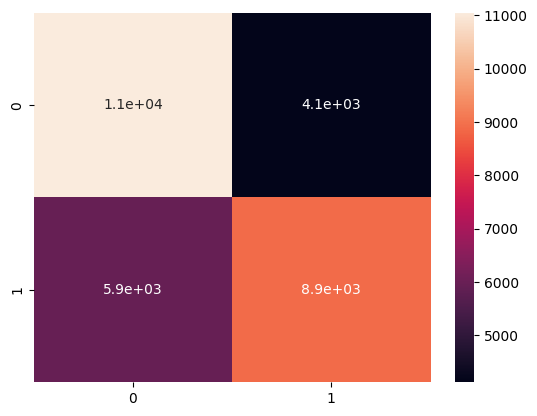

In [42]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')

In [43]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pred), recall_score(y_test, pred)

# Based on the result we move on to other models...

(0.6833038529570099, 0.5990830018205111)

In [49]:
forest_class = RandomForestClassifier(n_estimators=100,max_depth=20)
forest_class.fit(X_train_norm, y_train)
pred_forest = forest_class.predict(X_test_norm)

print(classification_report(y_test, pred_forest))

MAE 0.2551
RMSE 0.5050742519669756


/Users/adamo/Documents/Bootcamp/week6/spotipy_project/spotipy/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.7449
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     15169
           1       0.76      0.70      0.73     14831

    accuracy                           0.74     30000
   macro avg       0.75      0.74      0.74     30000
weighted avg       0.75      0.74      0.74     30000



In [57]:
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

ada_class.fit(X_train_norm,y_train)

pred_ada = ada_class.predict(X_test_norm)

print(classification_report(y_test, pred_ada))

# We abandon this model

/Users/adamo/Documents/Bootcamp/week6/spotipy_project/spotipy/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.79      0.75     15169
           1       0.76      0.69      0.72     14831

    accuracy                           0.74     30000
   macro avg       0.74      0.74      0.74     30000
weighted avg       0.74      0.74      0.74     30000



In [59]:
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=40),n_estimators=400,max_samples=1000, bootstrap=False)

bagging_class.fit(X_train_norm, y_train)

pred_bag = bagging_class.predict(X_test_norm)

print(classification_report(y_test, pred_bag))

# we pick this model

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     15169
           1       0.77      0.70      0.73     14831

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000



In [60]:
gb_class = GradientBoostingClassifier(max_depth=20,n_estimators=100)
gb_class.fit(X_train_norm, y_train)

pred_gb = gb_class.predict(X_test_norm)

print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     15169
           1       0.75      0.69      0.72     14831

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000



## Testing models with different features (only numerical)

In [53]:
features2 = df_random_sample[['transaction_amount', 'account_age_days', 'transaction_hour', 'customer_age','quantity', 'day_of_week',"month"]]
target2=df_random_sample["is_fraudulent"]

In [54]:
features2

,transaction_amount,account_age_days,transaction_hour,customer_age,quantity,day_of_week,month
460327,136.84,9,2,40,3,5,3
275047,11.66,215,0,30,3,5,3
681032,227.69,13,2,41,4,2,2
184103,2117.15,301,9,24,5,2,2
1335300,25.89,28,21,47,3,5,2
...,...,...,...,...,...,...,...
265947,207.82,279,11,24,5,5,1
129736,56.10,322,10,35,3,4,2
49468,283.44,222,18,62,3,3,3
667998,132.54,228,2,40,1,0,2


In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.20, random_state=0)

normalizer = MinMaxScaler()
normalizer.fit(X_train2)

X_train2_norm = normalizer.transform(X_train2)
X_test2_norm = normalizer.transform(X_test2)

X_train2_norm = pd.DataFrame(X_train2_norm, columns = X_train2.columns)
X_test2_norm = pd.DataFrame(X_test2_norm, columns = X_test2.columns)


In [56]:
forest_class2 = RandomForestClassifier(n_estimators=1000,max_depth=100)
forest_class2.fit(X_train2_norm, y_train2)
pred_forest2 = forest_class2.predict(X_test2_norm)

print(classification_report(y_test2, pred_forest2))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     15169
           1       0.76      0.70      0.73     14831

    accuracy                           0.74     30000
   macro avg       0.74      0.74      0.74     30000
weighted avg       0.74      0.74      0.74     30000



In [63]:
bagging_class2 = BaggingClassifier(DecisionTreeClassifier(max_depth=40),n_estimators=400,max_samples=1000, bootstrap=False)

bagging_class2.fit(X_train2_norm, y_train2)

pred_bag2 = bagging_class2.predict(X_test2_norm)

print(classification_report(y_test2, pred_bag2))

# we decide to stay with the previous features set (numerical + dummies)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     15169
           1       0.77      0.69      0.73     14831

    accuracy                           0.74     30000
   macro avg       0.75      0.74      0.74     30000
weighted avg       0.75      0.74      0.74     30000



In [67]:
grid = {"n_estimators": [50, 100,500],     
        "estimator__max_depth":[10, 40, 100],
          'max_samples': [0.5, 0.75, 1.0],}

model = GridSearchCV(estimator = bagging_class, param_grid = grid, cv=5)
model.fit(X_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(bootstrap=False,
                                         estimator=DecisionTreeClassifier(max_depth=40),
                                         max_samples=1000, n_estimators=400),
             param_grid={'estimator__max_depth': [10, 40, 100],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [50, 100, 500]})

In [69]:
model.best_params_

{'estimator__max_depth': 10, 'max_samples': 0.75, 'n_estimators': 100}

In [70]:
pred_model = model.predict(X_test_norm)

print(classification_report(y_test, pred_model))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76     15169
           1       0.76      0.71      0.73     14831

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000

